# 3 Fraude en transacciones bancarias

In [1]:
import pandas as pd
import urllib
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

#### (a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

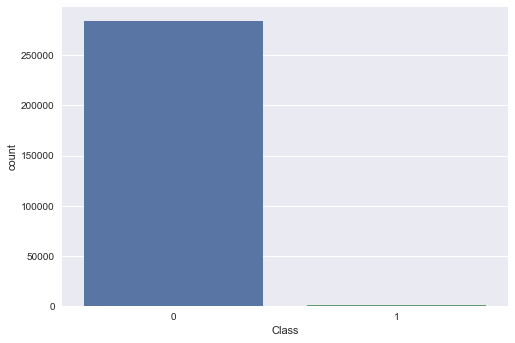

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

In [3]:
count_class = pd.value_counts(dt['Class'].values)
print("===================================================")
print("Cantidad de elementos por clase")
print("===================================================")
print("Elementos pertenecientes a la clase 0 es de", count_class[0])
print("Elementos pertenecientes a la clase 1 es de", count_class[1])
print("===================================================")

Cantidad de elementos por clase
Elementos pertenecientes a la clase 0 es de 284315
Elementos pertenecientes a la clase 1 es de 492


Como podemos apreciar el dataset se encuentra desbalanceado y la diferencia es muy significativa por lo que esto puede traer problemas a la hora de hacer la clasificación de los datos, es decir la clasificacion puede quedar sesgada hacia la clase que posee una mayor cantidad de elementos.

In [62]:
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Otro dato a tener enconsideracion es la cantidad de caracteristicas que posee este dataset, como podemos apreciar este dataset contiene un total de 30 (Tiempo + monto y otras 28 sin nombre).

#### (b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [5]:
from sklearn.preprocessing import StandardScaler
# Se agrega la columna nAmount con los datos de Amount normalizados 
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
# Se eliminan la columna del tiempo y amount
dt.drop(["Time","Amount"],axis=1,inplace=True)

In [6]:
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Se realiza la estandarización al atributo amount ya que este se encuentra en una escala distinta del resto de las caracteristicas.

#### (c) Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta funcion deberia mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas metricas. Debería además mostrar una curva ROC junto al valor del area bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qu´e es una matriz deconfusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qu´e relaci´on tiene con la matriz de confusi´on?

In [7]:
from sklearn.metrics import roc_curve, auc

def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0])))
    fig= plt.figure(figsize=(6,3))
    print("TP: %d"%cnf_matrix[1,1,])
    print("TN: %d"%cnf_matrix[0,0])
    print("FP: %d"%cnf_matrix[0,1])
    print("FN: %d"%cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    
    ''' You have to complete this function, ROC Curve is missing'''
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### (d) Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique que está haciendo la función.

In [8]:
from sklearn.model_selection import train_test_split

def data_prepration(x):
    #Se guardan solo las caracteristicas, se omite la columna Class.
    x_features= x.iloc[:,x.columns != "Class"]
    #Se guradan solo las etiquetas correspondietes a las clases.
    x_labels=x.iloc[:,x.columns=="Class"]
    #Se separan en subconjuntos los datas, asignando para entrenamiento y testing.
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    #Se imprime el largo de los nuevos datasets generados. 
    print("Length of training data: %d"%len(x_train))
    print("Length of test data: %d"%len(x_test))
    #Se retornan el train_set y test_set 
    return(x_train,x_test,y_train,y_test)

La funcion data_prepration recibe como input el dataset completo y divide este en las caracteristicas y las clases, luego se aplica la funcion train_test_split a esos dos nuevos subconjuntos para generar los datasets respectivos para entrenamiento y pruebas, es decir x_train, y_train, x_test, y_test. Finalmente retorna estos datasets.

In [9]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)

Length of training data: 199364
Length of test data: 85443


#### (e) Defina una función que realice Undersample [8] . ¿Explique en que consiste esta técnica?

In [10]:
def undersample(data,times):
    #Se obtienen los indeces de los elementos pertenecientes a cada clase
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    #Se obtiene la cantidad de elementos de cada clase
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    #Se escogen al azar indices normales 
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    #Se seleccionan los indices del datsset reducido
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    #Se crea el dataset reducido
    undersample_data = data.iloc[undersample_data,:]
    #Se indica la proporcion de cada clase.
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print("The normal transacation proportion is : %f"%normal)
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print("The fraud transacation proportion is : %f"%fraud)
    return(undersample_data)

Undersampling es una de las tecnicas más simple para trabajar con datos desbalanceados. Esta tecnica consiste en seleccionar de forma aleatoria parte de los datos pertenecientes a la clase mayoritaria y eliminandolos hasta que quede equilibrio con la clase minoritaria. El problema de  realizar esta eliminacion en los datos es que se puede perder informacion que puede ser util a la hora de realizar la clasificación


Fuente: https://www.irjet.net/archives/V4/i8/IRJET-V4I857.pdf

#### (f) Genere un modelo de Logistic Regression y otro a su elección utilizando UnderSample [8] . Concluya a partir de los resultados.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, recall_score, precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report

x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
#print(x_tr["Class"])
x_tr = x_tr.reset_index(drop=True)

def apply_log_regression(i):
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)
    print("---------------------------------------------------------------")

def apply_naive_bayes(i):
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf = BernoulliNB()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)
    print("---------------------------------------------------------------")

    def do_SVM2(x,y,xt,yt,C):
        print("C Value:",C)
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        return model
    
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

Length of training data: 199364
Length of test data: 85443


The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 476
Length of test data: 204
The recall for this model is: 0.930000
TP: 93
TN: 99
FP: 5
FN: 7


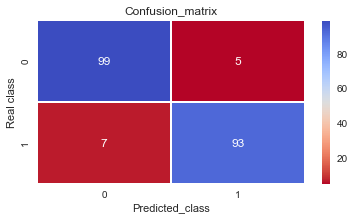


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       104
          1       0.95      0.93      0.94       100

avg / total       0.94      0.94      0.94       204



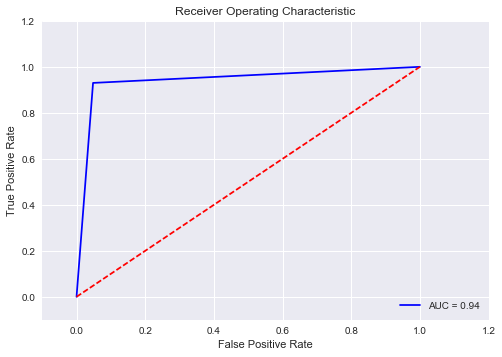

--------------------------Testing Set---------------------------
The recall for this model is: 0.953947
TP: 145
TN: 81339
FP: 3952
FN: 7


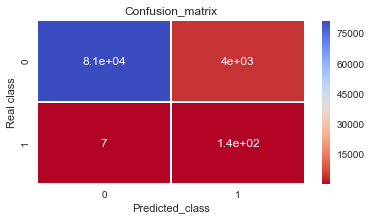


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85291
          1       0.04      0.95      0.07       152

avg / total       1.00      0.95      0.97     85443



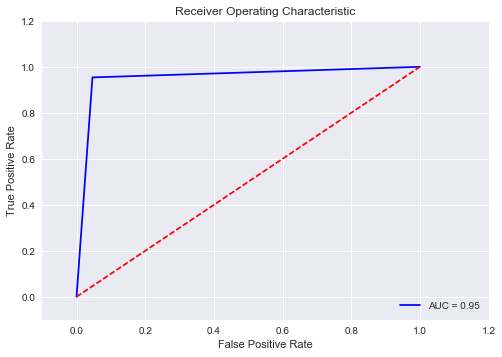

---------------------------------------------------------------


In [12]:
apply_log_regression(1)

In [17]:
#apply_log_regression(2)

The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 476
Length of test data: 204
The recall for this model is: 0.825243
TP: 85
TN: 101
FP: 0
FN: 18


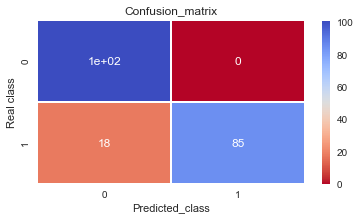


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       101
          1       1.00      0.83      0.90       103

avg / total       0.93      0.91      0.91       204



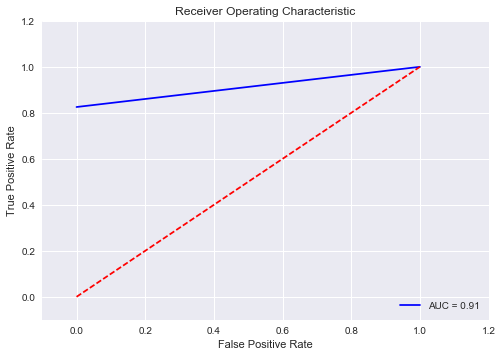

--------------------------Testing Set---------------------------
The recall for this model is: 0.861842
TP: 131
TN: 84497
FP: 794
FN: 21


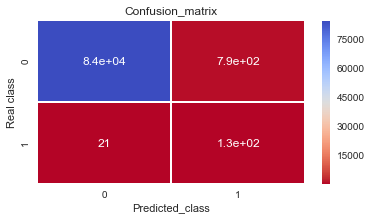


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85291
          1       0.14      0.86      0.24       152

avg / total       1.00      0.99      0.99     85443



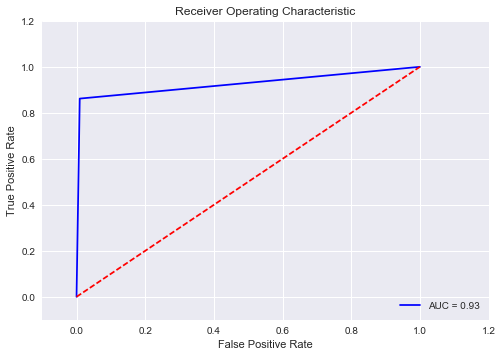

---------------------------------------------------------------


In [18]:
apply_naive_bayes(1)

#### (g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling [7] y SMOTE [8] (Hint: Para SMOTE usted puede apoyarse de la libreria imblearn)

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier # Random forest classifier

os = SMOTE(random_state=492)
print(y_tr["Class"].values.ravel())
#os_data_X,os_data_y=os.fit_sample(x_tr,y_tr)

[0 0 0 ..., 0 0 0]


In [100]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
columns =  x_tr.columns
print(len(columns))
x_tr = x_tr.reset_index(drop=True)
x_ts["Class"] = y_ts["Class"]
x_ts = x_ts.reset_index(drop=True)

def apply_log_regression_smote():
    #Undersample_data = undersample(x_tr,i)
    os_data_X,os_data_y = os.fit_sample(x_tr,y_tr['Class'])
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
    #print("\n----------------------Validation Set------------------------")
    #print("\nThe model classification for " + str(i) + " proportion\n")
    clf=LogisticRegression()
    model(clf,os_data_X,x_ts,os_data_y,y_ts)
    print("---------------------------------------------------------------")

Length of training data: 199364
Length of test data: 85443
30


The recall for this model is: 1.000000
TP: 157
TN: 85286
FP: 0
FN: 0


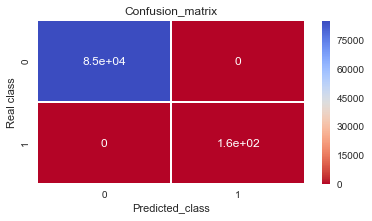


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85286
          1       1.00      1.00      1.00       157

avg / total       1.00      1.00      1.00     85443



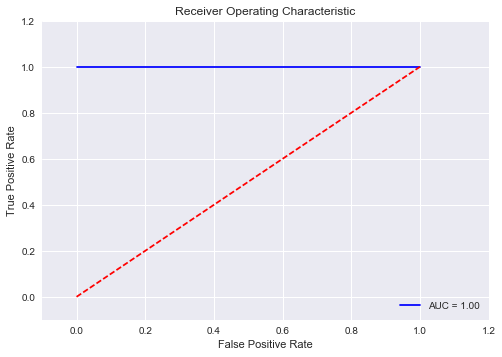

---------------------------------------------------------------


In [102]:
apply_log_regression_smote()